In [16]:
# Convolutional Neural Network (CNN)
## this notbook demonstrates using a CNN Model to classify 7 facial Emotions and correctly predict them using images or frames
## This notbook uses keras and tensorflow to load the data from Directory und feed them to the Sequential model
from keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    zoom_range=0.2,
    rotation_range= 0.2,
    vertical_flip= True
)
train_generator = train_datagen.flow_from_directory(
    'src/train',
    target_size=(160, 160),
    batch_size=128,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator()
validation_generator = test_datagen.flow_from_directory(
    'src/test',
    target_size=(160, 160),
    batch_size=128,
    class_mode='categorical'
 )

# Convolutional Neural Network (CNN)
## this notbook demonstrates using a CNN Model to classify 7 facial Emotions and correctly predict them using images or frames
## This notbook uses keras and tensorflow to load the data from Directory und feed them to the Sequential model
from keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np



classes = ["0", "1", "2", "3", "4", "5", "6"]
class_names = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprised"]
train_dir = "src/train"
val_dir = "src/test"

BATCH_SZIZE = 128
IMG_SIZE = (160, 160)
# load the training and Validation data from Directory
# the used dataset:  FER-2013/Kaggle        https://www.kaggle.com/datasets/msambare/fer2013?select=test
train_images = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                           #shuffle=True,
                                                           batch_size=BATCH_SZIZE,
                                                           image_size=IMG_SIZE
                                                           )

test_images = tf.keras.utils.image_dataset_from_directory(val_dir,
                                                          shuffle=True,
                                                          batch_size=BATCH_SZIZE,
                                                          image_size=IMG_SIZE
                                                          )
# create the model and its layers
# Note that the Images are not getting rescaled
# instade of it we are using a Rescalinglayer in the model after the input layer


model = models.Sequential()
model.add(layers.InputLayer(input_shape=(160, 160, 3)))
model.add(layers.Rescaling(scale=1. / 255.))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))



model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(7, activation="softmax"))

model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=6,
                    validation_data=validation_generator)





Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
Epoch 1/6


2022-05-11 15:14:58.544359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - ETA: 0s - loss: 1.8317 - accuracy: 0.2376

2022-05-11 15:18:48.494010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - 244s 1s/step - loss: 1.8317 - accuracy: 0.2376 - val_loss: 1.7465 - val_accuracy: 0.2923
Epoch 2/6
225/225 [==============================] - 176s 778ms/step - loss: 1.7637 - accuracy: 0.2733 - val_loss: 1.7028 - val_accuracy: 0.3154
Epoch 3/6
225/225 [==============================] - 177s 785ms/step - loss: 1.7160 - accuracy: 0.3013 - val_loss: 1.6405 - val_accuracy: 0.3565
Epoch 4/6
225/225 [==============================] - 186s 817ms/step - loss: 1.6480 - accuracy: 0.3457 - val_loss: 1.5332 - val_accuracy: 0.4018
Epoch 5/6
225/225 [==============================] - 199s 860ms/step - loss: 1.5859 - accuracy: 0.3772 - val_loss: 1.5020 - val_accuracy: 0.4138
Epoch 6/6
225/225 [==============================] - 190s 845ms/step - loss: 1.5451 - accuracy: 0.3960 - val_loss: 1.4739 - val_accuracy: 0.4377


In [7]:
history2 = model.fit(train_generator, epochs=6,
                    validation_data=validation_generator)

Epoch 1/6
225/225 [==============================] - 175s 766ms/step - loss: 1.5072 - accuracy: 0.4138 - val_loss: 1.4397 - val_accuracy: 0.4436
Epoch 2/6
225/225 [==============================] - 174s 770ms/step - loss: 1.4729 - accuracy: 0.4323 - val_loss: 1.3953 - val_accuracy: 0.4581
Epoch 3/6
225/225 [==============================] - 172s 764ms/step - loss: 1.4475 - accuracy: 0.4429 - val_loss: 1.3782 - val_accuracy: 0.4609
Epoch 4/6
225/225 [==============================] - 168s 744ms/step - loss: 1.4333 - accuracy: 0.4495 - val_loss: 1.3770 - val_accuracy: 0.4694
Epoch 5/6
225/225 [==============================] - 165s 730ms/step - loss: 1.4092 - accuracy: 0.4601 - val_loss: 1.3341 - val_accuracy: 0.4862
Epoch 6/6
225/225 [==============================] - 176s 780ms/step - loss: 1.3927 - accuracy: 0.4676 - val_loss: 1.3562 - val_accuracy: 0.4843


In [10]:
history3 = model.fit(train_generator, epochs=6,
                     validation_data=validation_generator)

Epoch 1/6
225/225 [==============================] - 235s 1s/step - loss: 1.3717 - accuracy: 0.4677 - val_loss: 1.3412 - val_accuracy: 0.4836
Epoch 2/6
225/225 [==============================] - 210s 919ms/step - loss: 1.3648 - accuracy: 0.4750 - val_loss: 1.3266 - val_accuracy: 0.4955
Epoch 3/6
225/225 [==============================] - 196s 867ms/step - loss: 1.3547 - accuracy: 0.4806 - val_loss: 1.3173 - val_accuracy: 0.4943
Epoch 4/6
225/225 [==============================] - 193s 857ms/step - loss: 1.3360 - accuracy: 0.4892 - val_loss: 1.3201 - val_accuracy: 0.4921
Epoch 5/6
225/225 [==============================] - 208s 922ms/step - loss: 1.3325 - accuracy: 0.4909 - val_loss: 1.2791 - val_accuracy: 0.5024
Epoch 6/6
225/225 [==============================] - 213s 946ms/step - loss: 1.3193 - accuracy: 0.4939 - val_loss: 1.2984 - val_accuracy: 0.4979


In [15]:
#model.save("models&Historys/model/CNN_With_Generator_model.h5")

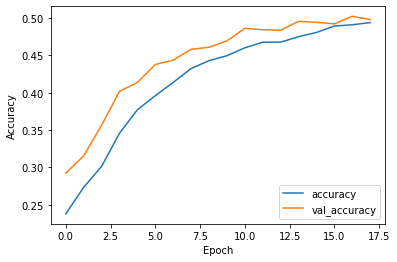

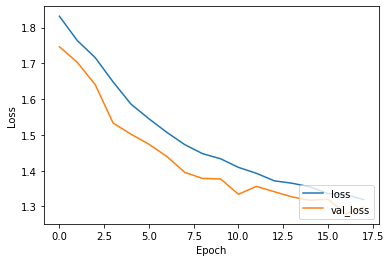

In [12]:
acc = history.history['accuracy']+history2.history['accuracy']+history3.history['accuracy']
val_acc = history.history['val_accuracy']+history2.history['val_accuracy']+history3.history['val_accuracy']

plt.plot(acc, label='accuracy')
plt.plot(val_acc, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

loss = history.history['loss']+history2.history['loss']+history3.history['loss']
val_loss = history.history['val_loss']+history2.history['val_loss']+history3.history['val_loss']

plt.plot(loss, label='loss')
plt.plot(val_loss, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [13]:
# Run the following cells to see the live detection of facial emotions
import cv2
import numpy as np
import tensorflow as tf

classes = ["0", "1", "2", "3", "4", "5", "6"]
class_names = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprised"]




def closeAll():
    cv2.namedWindow("win")
    cv2.startWindowThread()
    cv2.destroyAllWindows()


#thest the model on one image
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
frame = cv2.imread("test.png")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces:
    roi_gray = gray[y:y + h, x: x + w]
    roi_color = frame[y:y + h, x: x + w]
    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 11, 55), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:

        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:  #show found faces and the predicted emotions
            face_roi = roi_color[ey: ey + eh, ex: ex + ew]
            final_image = cv2.resize(face_roi, (160, 160))
            final_image = np.expand_dims(final_image, axis=0)  #need 4th Dimention
            #final_image = final_image / 255.0  #normalize
            predictions = model.predict(final_image)
            print(class_names[np.argmax(predictions)])

# Run the live cam
font = cv2.FONT_HERSHEY_PLAIN
#set the rectangle background to white
rectangle_bgr = (255, 255, 255)
#make a black image
img = np.zeros((500, 500))
#set some text
text = "Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=1.5, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
#make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=1.5, color=(0, 0, 0), thickness=1)
cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    #eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            continue
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey + eh, ex:ex + ew]  ## cropping the face
                final_image = cv2.resize(face_roi, (160, 160))
                final_image = np.expand_dims(final_image,
                                             axis=0)  ## need fourth dimension # we dont rescale because the model have a rescaling layer
                font = cv2.FONT_HERSHEY_SIMPLEX
                Predictions = model.predict(final_image)
                #font = cv2.FONT_HERSHEY_PLAIN

                #show the name of predicted emotion
                status = class_names[np.argmax(Predictions)]
                x1, y1, w1, h1 = 0, 0, 175, 75
                #Draw black background rectangle
                cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
                #Addd text
                cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                            (0, 0, 255), 2)
                cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255))

    cv2.imshow('Face Emotion Recognition', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()



happy


OpenCV: out device of bound (0-0): 1
OpenCV: camera failed to properly initialize!


In [14]:
closeAll()  # if the python3.80 window did not close, use this cell separately